In [4]:
# library for preprocessing
import numpy as np
import cv2 as cv
import os
import random
import matplotlib.pyplot as plt

# library for model implementation
from tensorflow import keras
from tensorflow.keras import models

# Ignore  the warnings
import warnings
warnings.filterwarnings('always')
warnings.filterwarnings('ignore')

In [5]:
DIRECTORY = 'Dataset'
CATEGORIES = ['Bacterialleafblight', 'Brownspot', 'HEALTHY', 'Leafsmut']

In [6]:
SIZE = 224

DATA = []

for category in CATEGORIES:
    folder = os.path.join(DIRECTORY, category)
    label = CATEGORIES.index(category)
    for img in os.listdir(folder):
        img_path = os.path.join(folder, img)
        img_arr = cv.imread(img_path)
        img_arr = cv.resize(img_arr, (SIZE, SIZE))
        DATA.append([img_arr, label])

In [7]:
len(DATA)

510

In [8]:
random.shuffle(DATA)

In [9]:
DATA[0]

[array([[[228, 222, 203],
         [228, 224, 199],
         [228, 224, 200],
         ...,
         [  7, 103,  62],
         [  3, 114,  75],
         [ 10, 135,  85]],
 
        [[228, 222, 203],
         [228, 224, 199],
         [228, 224, 200],
         ...,
         [  2, 113,  73],
         [ 11, 131,  94],
         [ 17, 124,  72]],
 
        [[228, 222, 203],
         [228, 224, 199],
         [228, 224, 200],
         ...,
         [ 10, 134,  89],
         [ 11, 128,  72],
         [112, 186, 163]],
 
        ...,
 
        [[ 24, 141, 106],
         [ 91, 203, 170],
         [ 12, 133,  82],
         ...,
         [239, 245, 244],
         [242, 248, 247],
         [243, 249, 248]],
 
        [[  9, 135,  88],
         [ 77, 176, 152],
         [ 19, 138,  91],
         ...,
         [241, 243, 243],
         [241, 248, 246],
         [243, 249, 248]],
 
        [[  2, 129,  80],
         [ 89, 186, 165],
         [ 12, 132,  84],
         ...,
         [245, 247, 247],
  

In [10]:
X = []
Y = []

for FEATURES, TARGET in DATA:
    X.append(FEATURES)
    Y.append(TARGET)

In [11]:
X = np.array(X)
Y = np.array(Y)

In [12]:
X.shape

(510, 224, 224, 3)

In [13]:
X.shape

(510, 224, 224, 3)

In [14]:
Y.shape

(510,)

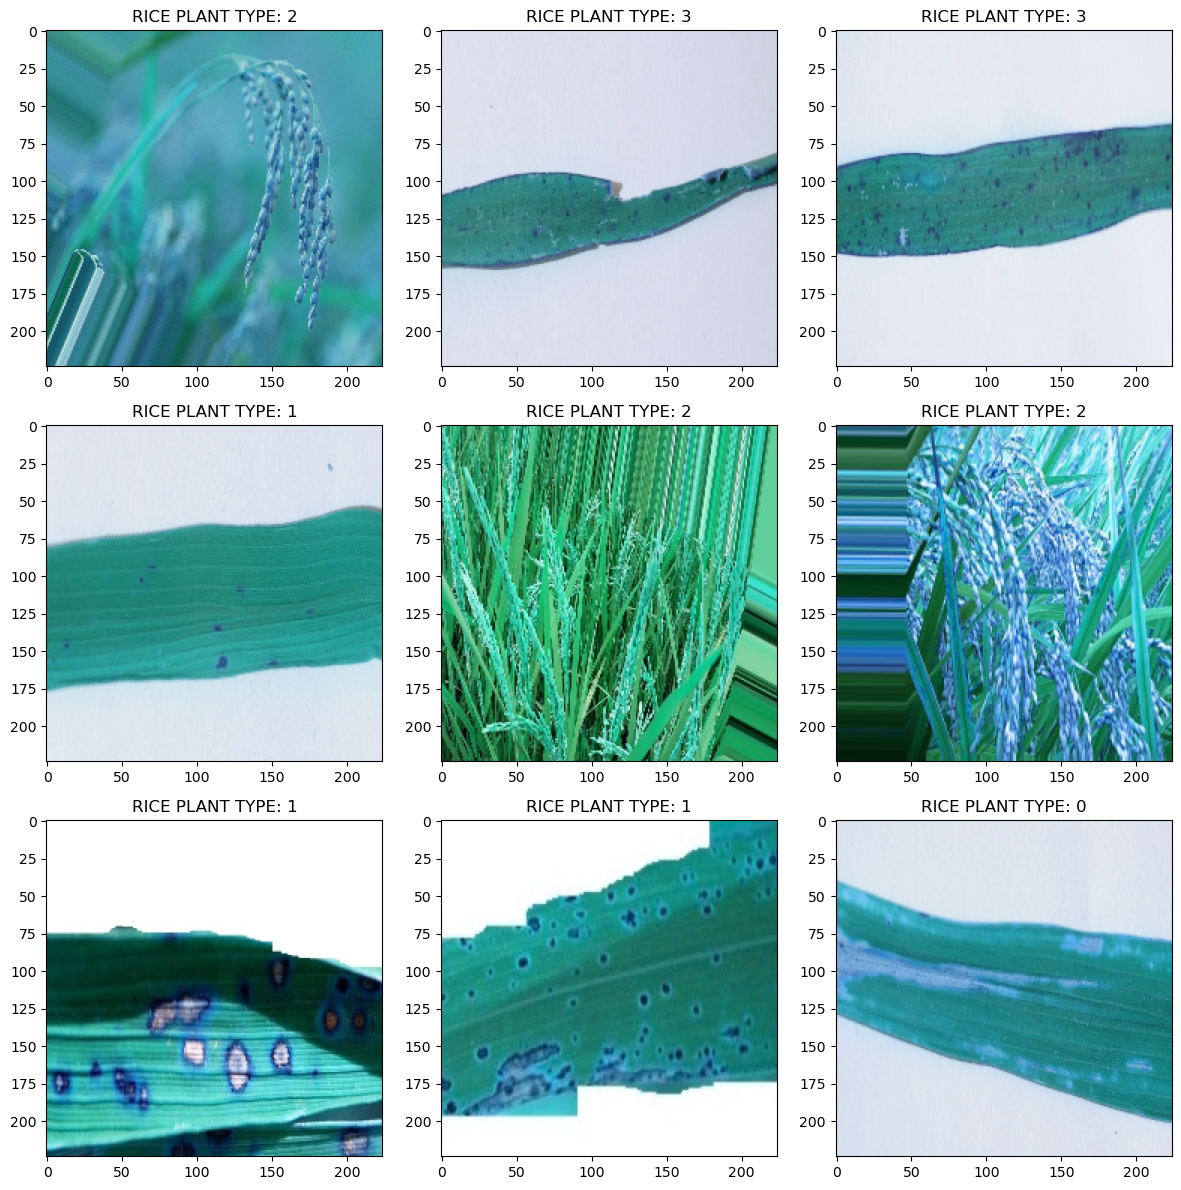

In [15]:
# Here Type Represent {0 : 'Bacterialleafblight', 1 : 'Brownspot', 2  : 'HEALTHY', 3 : 'LEAFsmut'}

fig,ax=plt.subplots(3, 3)
fig.set_size_inches(12,12)
for i in range(3):
    for j in range (3):
        l=random.randint(0,len(Y))
        ax[i,j].imshow(X[l])
        ax[i,j].set_title('RICE PLANT TYPE: '+ str(Y[l]))
        
plt.tight_layout()

#### SPLITING THE DATA FOR TRAINING AND TESTING

In [16]:
from sklearn.model_selection import train_test_split

In [17]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.25, random_state = 1)

In [18]:
X_train.shape

(382, 224, 224, 3)

In [19]:
X_test.shape

(128, 224, 224, 3)

In [20]:
y_train.shape

(382,)

In [21]:
y_test.shape

(128,)

In [22]:
X_train[0]

array([[[224, 220, 201],
        [224, 220, 201],
        [221, 223, 201],
        ...,
        [204, 252, 253],
        [104, 190, 197],
        [ 32, 120, 127]],

       [[224, 220, 201],
        [224, 220, 201],
        [221, 223, 201],
        ...,
        [109, 197, 201],
        [ 33, 126, 134],
        [114, 180, 179]],

       [[224, 220, 201],
        [224, 220, 201],
        [220, 222, 200],
        ...,
        [ 40, 129, 132],
        [111, 176, 179],
        [ 68, 172, 165]],

       ...,

       [[219, 220, 200],
        [211, 217, 203],
        [202, 222, 211],
        ...,
        [247, 253, 252],
        [247, 253, 252],
        [243, 249, 248]],

       [[211, 217, 202],
        [204, 222, 209],
        [155, 227, 224],
        ...,
        [246, 252, 251],
        [247, 253, 252],
        [244, 250, 249]],

       [[204, 222, 208],
        [158, 224, 222],
        [103, 194, 198],
        ...,
        [246, 252, 251],
        [247, 253, 252],
        [244, 250, 249]]

In [23]:
y_train[:20]

array([2, 2, 2, 3, 1, 2, 2, 2, 1, 2, 1, 1, 2, 2, 2, 2, 0, 0, 2, 1])

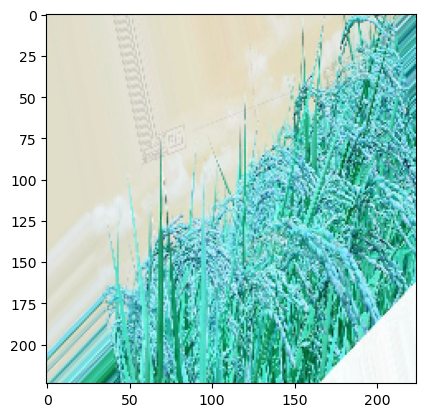

In [24]:
plt.imshow(X_train[0])
plt.show()

In [25]:
y_train = y_train.reshape(-1,)
y_train[:5]

array([2, 2, 2, 3, 1])

In [26]:
classes = ['Bacterialleafblight', 'Brownspot', 'HEALTHY', 'Leafsmut']

In [27]:
def plot_sample(X, y, index):
    plt.figure(figsize=(5, 5))
    plt.imshow(X[index])
    plt.xlabel(classes[y[index]])

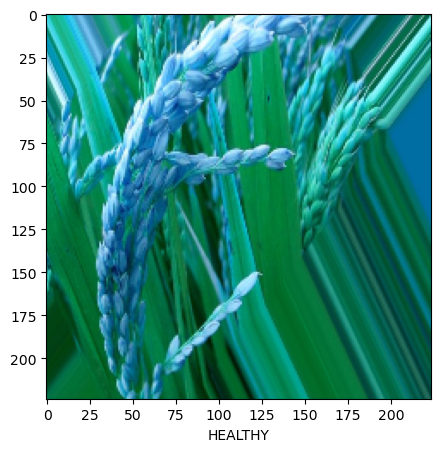

In [28]:
plot_sample(X_train, y_train, 1)

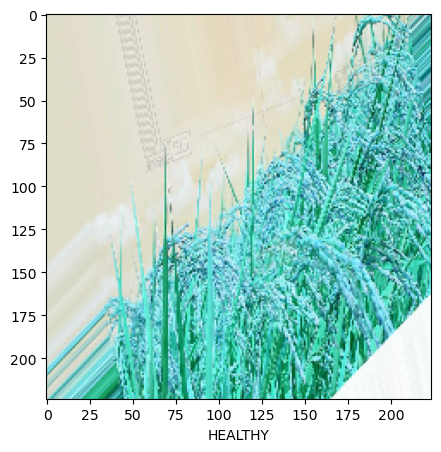

In [29]:
plot_sample(X_train, y_train, 0)

In [30]:
### Data Normalization

X_train = X_train/255
X_test = X_test/255

from keras.preprocessing.image import ImageDataGenerator

datagen = ImageDataGenerator(
        featurewise_center=False,  # set input mean to 0 over the dataset
        samplewise_center=False,  # set each sample mean to 0
        featurewise_std_normalization=False,  # divide inputs by std of the dataset
        samplewise_std_normalization=False,  # divide each input by its std
        zca_whitening=False,  # apply ZCA whitening
        rotation_range=10,  # randomly rotate images in the range (degrees, 0 to 180)
        zoom_range = 0.1, # Randomly zoom image 
        width_shift_range=0.2,  # randomly shift images horizontally (fraction of total width)
        height_shift_range=0.2,  # randomly shift images vertically (fraction of total height)
        horizontal_flip=True,  # randomly flip images
        vertical_flip=False)  # randomly flip images

datagen.fit(X_train)

### ResNet50 Model Implementation

In [31]:
from keras.applications.resnet import ResNet50

In [32]:
from tensorflow.keras import Sequential
from keras.layers import Dense, Flatten

resnet50 = Sequential()

mod2 = ResNet50(
    include_top=False,
    input_shape=(224, 224, 3),
    pooling='avg',
    classes=4,
    weights='imagenet')

for layer in mod2.layers:
    layer.trainabel=False
    

resnet50.add(mod2)
resnet50.add(Flatten())
resnet50.add(Dense(4, activation='softmax'))

resnet50.summary()

94765736/94765736 [==============================] - 52s 1us/step
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 resnet50 (Functional)       (None, 2048)              23587712  
                                                                 
 flatten (Flatten)           (None, 2048)              0         
                                                                 
 dense (Dense)               (None, 4)                 8196      
                                                                 
Total params: 23,595,908
Trainable params: 23,542,788
Non-trainable params: 53,120
_________________________________________________________________


In [33]:
resnet50.compile(optimizer='adam', 
            loss='sparse_categorical_crossentropy',
            metrics=['accuracy'])

In [34]:
model4 = resnet50.fit(datagen.flow(X_train, y_train), epochs=5, validation_data=(X_test, y_test))

Epoch 1/5
12/12 [==============================] - 137s 10s/step - loss: 0.9939 - accuracy: 0.7906 - val_loss: 2379.3242 - val_accuracy: 0.0703
Epoch 2/5
12/12 [==============================] - 118s 10s/step - loss: 0.4418 - accuracy: 0.8901 - val_loss: 31435.3438 - val_accuracy: 0.0703
Epoch 3/5
12/12 [==============================] - 123s 10s/step - loss: 0.2354 - accuracy: 0.9031 - val_loss: 6198.8408 - val_accuracy: 0.0781
Epoch 4/5
12/12 [==============================] - 123s 10s/step - loss: 0.1720 - accuracy: 0.9503 - val_loss: 799.9803 - val_accuracy: 0.7891
Epoch 5/5
12/12 [==============================] - 120s 10s/step - loss: 0.1892 - accuracy: 0.9346 - val_loss: 598.5132 - val_accuracy: 0.7891


In [35]:
resnet50.evaluate(X_test, y_test)

4/4 [==============================] - 8s 2s/step - loss: 598.5132 - accuracy: 0.7891


[598.51318359375, 0.7890625]

4/4 [==============================] - 8s 2s/step
Classification Report : 
               precision    recall  f1-score   support

           0       0.00      0.00      0.00         8
           1       0.00      0.00      0.00         9
           2       0.79      1.00      0.88       101
           3       0.00      0.00      0.00        10

    accuracy                           0.79       128
   macro avg       0.20      0.25      0.22       128
weighted avg       0.62      0.79      0.70       128



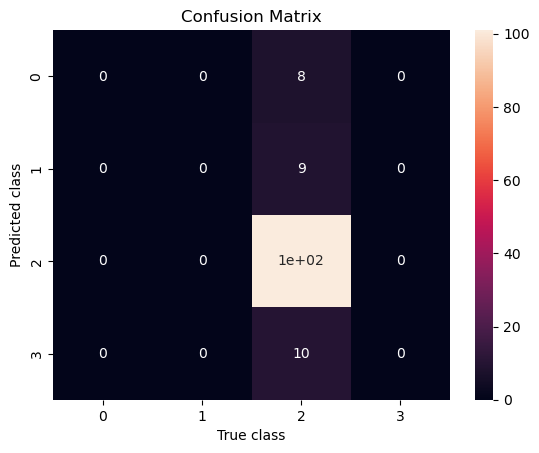

In [36]:
from sklearn.metrics import confusion_matrix, classification_report
import numpy as np
import seaborn as sns
pred4 = resnet50.predict(X_test)
pred4_class = [np.argmax(element) for element in pred4]

print('Classification Report : \n', classification_report(y_test, pred4_class))

conmax = confusion_matrix(y_test, pred4_class)

sns.heatmap(conmax,annot=True)
plt.xlabel('True class')
plt.ylabel('Predicted class')
plt.title('Confusion Matrix')
plt.show()

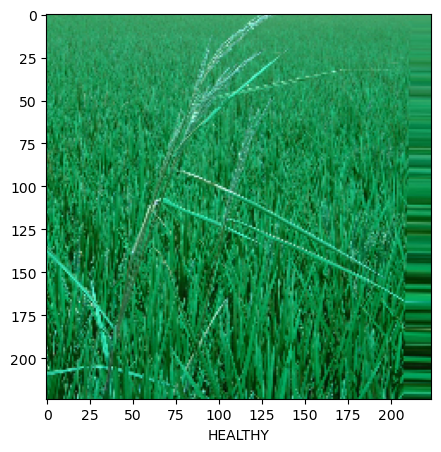

In [37]:
plot_sample(X_test, y_test, 3)

In [38]:
classes[pred4_class[3]]

'HEALTHY'

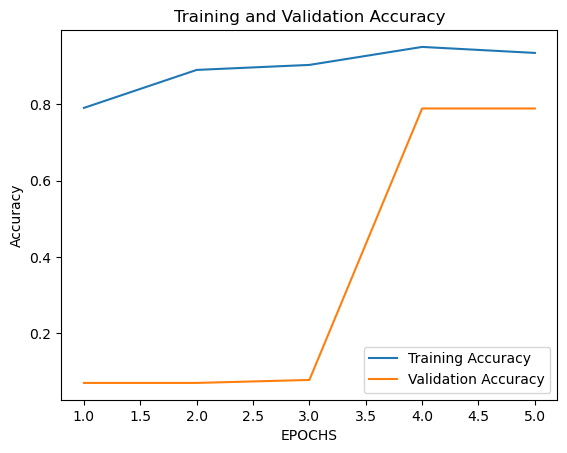

In [39]:
# plotting the graph for accuracy and vel_accuracy
acc = model4.history['accuracy']
val_acc = model4.history['val_accuracy']
epochs = range(1, len(acc)+1)

plt.plot(epochs, acc, label='Training Accuracy')
plt.plot(epochs, val_acc, label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('EPOCHS')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

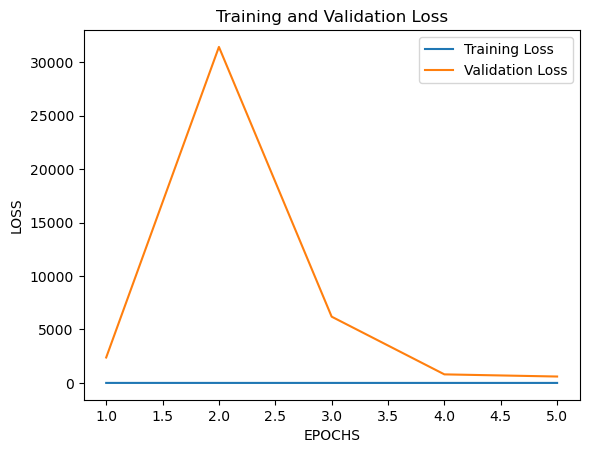

In [40]:
# plotting the graph for accuracy and vel_accuracy
loss = model4.history['loss']
val_loss = model4.history['val_loss']
epochs = range(1, len(acc)+1)

plt.plot(epochs, loss, label='Training Loss')
plt.plot(epochs, val_loss, label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('EPOCHS')
plt.ylabel('LOSS')
plt.legend()
plt.show()

4/4 [==============================] - 8s 2s/step


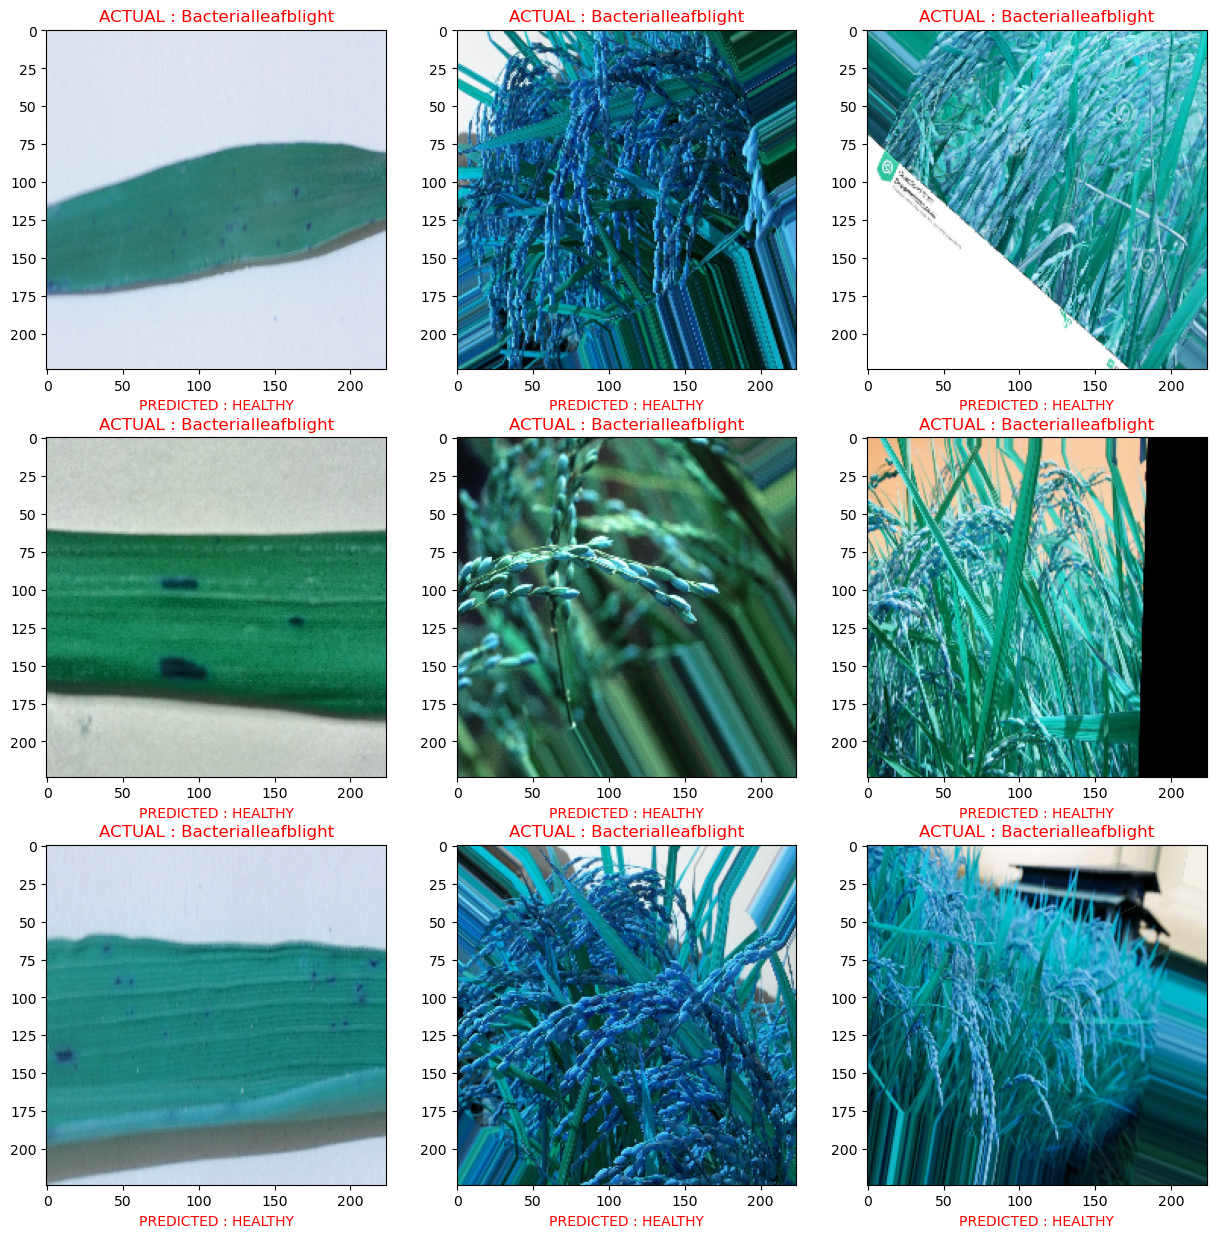

In [42]:
# categories = np.sort(os.listdir(DIRECTORY))
fig, ax = plt.subplots(3, 3, figsize=(15, 15))

for i in range(3):
    for j in range(3):
        k = int(np.random.random_sample() * len(X_test))
        if(classes[np.argmax(y_test[k])] == classes[np.argmax(resnet50.predict(X_test)[k])]):
            ax[i,j].set_title("ACTUAL : " + classes[np.argmax(y_test[k])], color='green')
            ax[i,j].set_xlabel("PREDICTED : " + classes[np.argmax(resnet50.predict(X_test)[k])], color='green')
            ax[i,j].imshow(np.array(X_test)[k].reshape(SIZE, SIZE, 3), cmap='gray')
        else:
            ax[i,j].set_title("ACTUAL : " + classes[np.argmax(y_test[k])], color='red')
            ax[i,j].set_xlabel("PREDICTED : " + classes[np.argmax(resnet50.predict(X_test)[k])], color='red')
            ax[i,j].imshow(np.array(X_test)[k].reshape(SIZE, SIZE, 3), cmap='gray')